In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")


In [3]:
#Load dataset and basic info
df = pd.read_csv("/content/2020.csv")

print("rows, columns:", df.shape)
print("\nColumn info:")
df.info()

print("\nFirst 5 rows:")
print(df.head())

print("\n statistics for numeric columns:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicated rows:", df.duplicated().sum())


rows, columns: (668461, 17)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668461 entries, 0 to 668460
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   @id                                       668461 non-null  object 
 1   sample.samplingPoint                      668461 non-null  object 
 2   sample.samplingPoint.notation             668461 non-null  object 
 3   sample.samplingPoint.label                668461 non-null  object 
 4   sample.sampleDateTime                     668461 non-null  object 
 5   determinand.label                         668461 non-null  object 
 6   determinand.definition                    668461 non-null  object 
 7   determinand.notation                      668461 non-null  int64  
 8   resultQualifier.notation                  116451 non-null  object 
 9   result                                    668461 n

Shape after dropping unused columns: (668461, 13)
Columns now in df1:
['sample.samplingPoint.notation', 'sample.samplingPoint.label', 'sample.sampleDateTime', 'determinand.label', 'determinand.notation', 'resultQualifier.notation', 'result', 'determinand.unit.label', 'sample.sampledMaterialType.label', 'sample.isComplianceSample', 'sample.purpose.label', 'sample.samplingPoint.easting', 'sample.samplingPoint.northing']

Head of cleaned df1:
  sample.samplingPoint.notation               sample.samplingPoint.label  \
0                     AN-011553   BP CONNECT, BRACKLEY, NORTHAMPTONSHIRE   
1                     AN-011553   BP CONNECT, BRACKLEY, NORTHAMPTONSHIRE   
2                     AN-011553   BP CONNECT, BRACKLEY, NORTHAMPTONSHIRE   
3                     AN-011553   BP CONNECT, BRACKLEY, NORTHAMPTONSHIRE   
4                     AN-011624  APOLLO OFFICE UNITS RADCLIVE RD GAWCOTT   

  sample.sampleDateTime determinand.label  determinand.notation  \
0   2020-02-27T12:45:00      Sld

/tmp/ipython-input-720812347.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


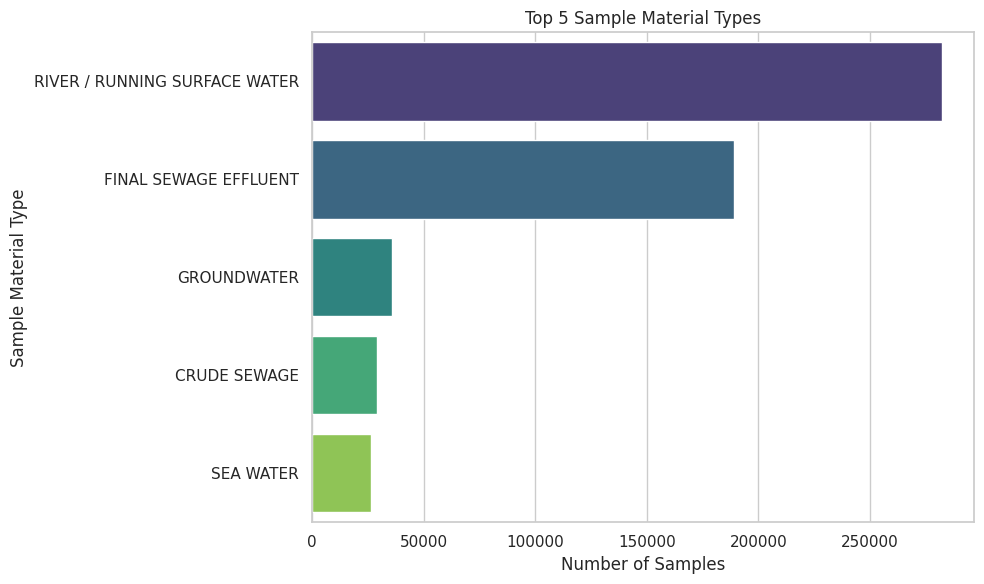


Top 10 determinands (pollutants):
Index(['BOD ATU', 'Ammonia(N)', 'Sld Sus@105C', 'Temp Water', 'COD as O2',
       'pH', 'O Diss %sat', 'Phosphorus-P', 'N Oxidised', 'Orthophospht'],
      dtype='object', name='determinand.label')


/tmp/ipython-input-720812347.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


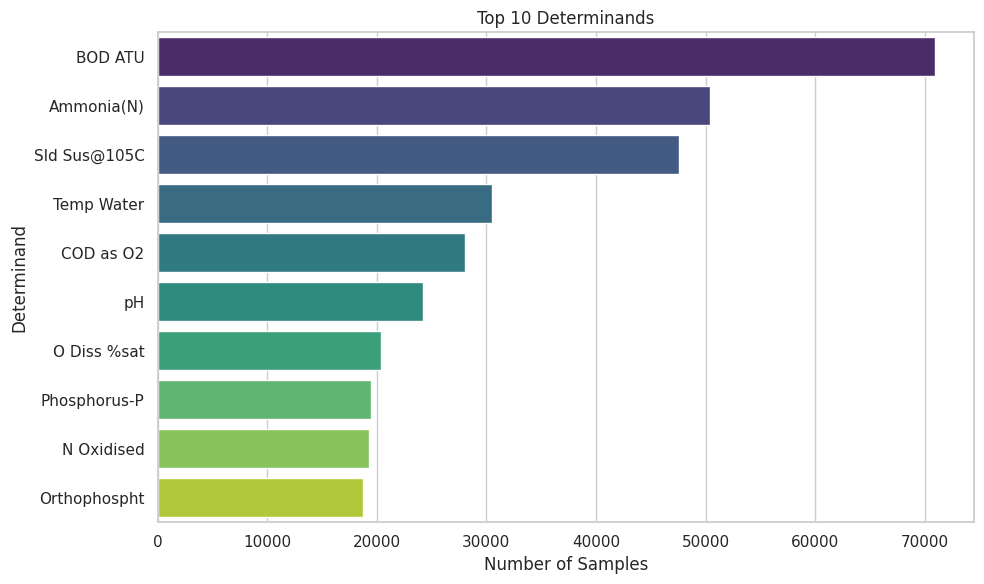

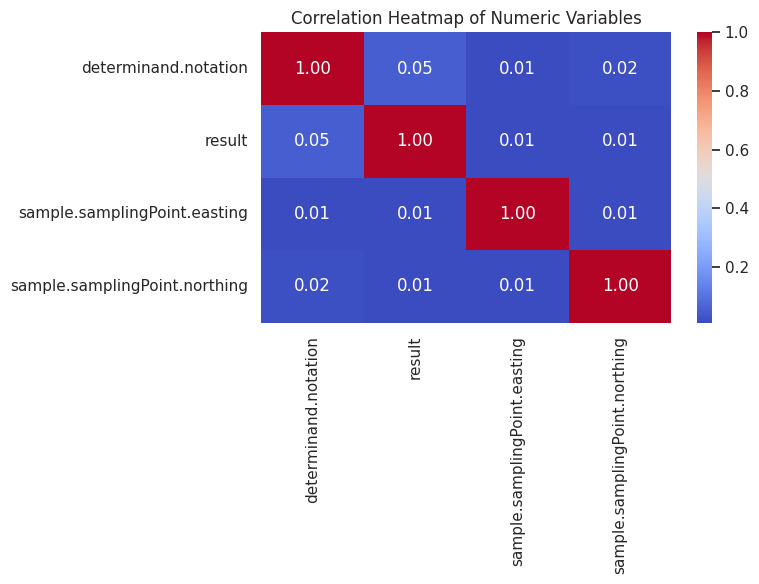

In [4]:
#cleaning and EDA

df = df.dropna(axis=1, how="all")

if "resultQualifier.notation" in df.columns:
    df["resultQualifier.notation"] = df["resultQualifier.notation"].fillna("Unknown")


cols_to_drop = [
    "@id",
    "sample.samplingPoint",
    "determinand.definition",
    "codedResultInterpretation.interpretation"
]
df1 = df.drop(columns=cols_to_drop, errors="ignore")

print("Shape after dropping unused columns:", df1.shape)
print("Columns now in df1:")
print(df1.columns.tolist())

print("\nHead of cleaned df1:")
print(df1.head())

#top 5 sample material types
if "sample.sampledMaterialType.label" in df1.columns:
    print("\nTop 10 sample material types:")
    print(df1["sample.sampledMaterialType.label"].value_counts().head(10))

    top5_types = df1["sample.sampledMaterialType.label"].value_counts().head(5).index
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df1[df1["sample.sampledMaterialType.label"].isin(top5_types)],
        y="sample.sampledMaterialType.label",
        order=top5_types,
        palette="viridis"
    )
    plt.title("Top 5 Sample Material Types")
    plt.xlabel("Number of Samples")
    plt.ylabel("Sample Material Type")
    plt.tight_layout()
    plt.show()

#top 10 determinands
if "determinand.label" in df1.columns:
    print("\nTop 10 determinands (pollutants):")
    top10_dets = df1["determinand.label"].value_counts().head(10).index
    print(top10_dets)

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df1[df1["determinand.label"].isin(top10_dets)],
        y="determinand.label",
        order=top10_dets,
        palette="viridis"
    )
    plt.title("Top 10 Determinands")
    plt.xlabel("Number of Samples")
    plt.ylabel("Determinand")
    plt.tight_layout()
    plt.show()

# Correlation heatmap
numeric_df = df1.select_dtypes(include=[np.number])

if numeric_df.shape[1] > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        numeric_df.corr(),
        annot=True,
        cmap="coolwarm",
        fmt=".2f"
    )
    plt.title("Correlation Heatmap of Numeric Variables")
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough numeric columns for correlation heatmap.")


In [5]:

type_col = "sample.sampledMaterialType.label"
if type_col not in df1.columns:
    type_col = "sample.materialType.label"

river_df = df1[df1[type_col] == "RIVER / RUNNING SURFACE WATER"].copy()
print("Number of river rows:", river_df.shape[0])

river_df = river_df.rename(columns={
    "sample.sampleDateTime": "date",
    "sample.samplingPoint.label": "location",
    type_col: "type",
    "sample.samplingPoint.easting": "easting",
    "sample.samplingPoint.northing": "northing",
    "determinand.label": "pollutant",
    "determinand.unit.label": "unit"
})[[
    "date", "location", "type", "easting", "northing",
    "pollutant", "result", "unit"
]]

print("\nHead of river_df:")
print(river_df.head())

top10_pollutants = river_df["pollutant"].value_counts().head(10).index.tolist()
print("\nTop 10 river pollutants:")
print(top10_pollutants)

river_top10 = river_df[river_df["pollutant"].isin(top10_pollutants)].copy()

#Pivot to pollutants as columns
wide_df = river_top10.pivot_table(
    index=["date", "location", "type", "easting", "northing"],
    columns="pollutant",
    values="result",
    aggfunc="first"   # if duplicates, take first
).reset_index()

wide_df.columns.name = None

print("\nWide_df shape (rows, columns):", wide_df.shape)
print("Columns in wide_df:")
print(wide_df.columns.tolist())
print("\nHead of wide_df:")
print(wide_df.head())


Number of river rows: 282489

Head of river_df:
                   date                                  location  \
9   2020-01-23T13:30:00  SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL   
10  2020-01-23T13:30:00  SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL   
11  2020-01-23T13:30:00  SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL   
12  2020-01-23T13:30:00  SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL   
13  2020-01-23T13:30:00  SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL   

                             type  easting  northing     pollutant   result  \
9   RIVER / RUNNING SURFACE WATER   463800    241400   O Diss %sat   92.200   
10  RIVER / RUNNING SURFACE WATER   463800    241400  Orthophospht    0.130   
11  RIVER / RUNNING SURFACE WATER   463800    241400   Alky pH 4.5  220.000   
12  RIVER / RUNNING SURFACE WATER   463800    241400    Ammonia(N)    0.053   
13  RIVER / RUNNING SURFACE WATER   463800    241400    Temp Water    7.000   

    unit  
9      %  
10  mg/l  
11  mg/l  
12  mg/l  
13   ce

In [24]:
# thresholds and pollution_status

# Defining thresholds
threshold_specs = {
    "Ammonia(N)": {"limit": 0.6, "condition": ">"},   # mg/L
    "Temp Water": {"limit": 25.0, "condition": ">"},  # °C
    "pH": {"low": 6.5, "high": 8.5},                  # pH units
    "N Oxidised": {"limit": 10.0, "condition": ">"},  # mg/L
    "O Diss %sat": {"limit": 80.0, "condition": "<"}  # % saturation
}

thresholds_actual = {}
for col in wide_df.columns:
    for base_name, rule in threshold_specs.items():
        if base_name in col:
            thresholds_actual[col] = rule

print("Thresholds applied to columns:")
for c in thresholds_actual:
    print(" ", c)


# Classification function
def classify_value(value, rule):
    """Classify a numeric value as Polluted / Not Polluted / Unknown."""
    if pd.isna(value):
        return "Unknown"
    if "condition" in rule:
        if rule["condition"] == ">" and value > rule["limit"]:
            return "Polluted"
        if rule["condition"] == "<" and value < rule["limit"]:
            return "Polluted"
        return "Not Polluted"
    else:

        if value < rule["low"] or value > rule["high"]:
            return "Polluted"
        return "Not Polluted"


status_cols = []
for col, rule in thresholds_actual.items():
    wide_df[col] = pd.to_numeric(wide_df[col], errors="coerce")
    status_col = col + "_status"
    wide_df[status_col] = wide_df[col].apply(lambda x: classify_value(x, rule))
    status_cols.append(status_col)


 # pollution status
def overall_status(row):
    """Overall pollution status for the sample."""
    if any(row[c] == "Polluted" for c in status_cols):
        return "Polluted"
    if all(row[c] == "Unknown" for c in status_cols):
        return "Unknown"
    return "Not Polluted"


wide_df["pollution_status"] = wide_df.apply(overall_status, axis=1)

print("\nOverall pollution_status value counts (including Unknown):")
print(wide_df["pollution_status"].value_counts())

print("\nSample of pollution_status with per-pollutant flags:")
cols_show = ["pollution_status"] + status_cols
print(wide_df[cols_show].head())


filtered_df = wide_df[wide_df["pollution_status"].isin(["Polluted", "Not Polluted"])]

counts = filtered_df["pollution_status"].value_counts()
percentages = filtered_df["pollution_status"].value_counts(normalize=True) * 100

print("\nPolluted vs Not Polluted (Unknown removed) — counts:")
print(counts)

print("\nPolluted vs Not Polluted (Unknown removed) — percentages:")
print(percentages.round(2))


Thresholds applied to columns:
  Ammonia(N)
  N Oxidised
  O Diss %sat
  Temp Water
  pH
  Ammonia(N)_status
  N Oxidised_status
  O Diss %sat_status
  Temp Water_status
  pH_status
  Ammonia(N)_status_status
  N Oxidised_status_status
  O Diss %sat_status_status
  Temp Water_status_status
  pH_status_status
  Ammonia(N)_status_status_status
  N Oxidised_status_status_status
  O Diss %sat_status_status_status
  Temp Water_status_status_status
  pH_status_status_status

Overall pollution_status value counts (including Unknown):
pollution_status
Not Polluted    19790
Name: count, dtype: int64

Sample of pollution_status with per-pollutant flags:
  pollution_status  Ammonia(N)_status  N Oxidised_status  O Diss %sat_status  \
0     Not Polluted                NaN                NaN                 NaN   
1     Not Polluted                NaN                NaN                 NaN   
2     Not Polluted                NaN                NaN                 NaN   
3     Not Polluted          

In [8]:
#modelling

from sklearn.preprocessing import LabelEncoder

model_df = wide_df[wide_df["pollution_status"] != "Unknown"].copy()

#features
#date, location, easting, northing , pollutant columns
exclude_cols = set(["type", "pollution_status"])
exclude_cols.update(status_cols)

feature_cols = []
for col in model_df.columns:
    if col not in exclude_cols:
        feature_cols.append(col)

print("Feature columns used for modelling:")
print(feature_cols)

# Encoding date and location as numeric labels
le_date = LabelEncoder()
le_location = LabelEncoder()

model_df["date"] = le_date.fit_transform(model_df["date"].astype(str))
model_df["location"] = le_location.fit_transform(model_df["location"].astype(str))

#Build X and y
X = model_df[feature_cols]  .copy()
y = model_df["pollution_status"].map({"Not Polluted": 0, "Polluted": 1})

print("\nX shape:", X.shape)
print("y value counts:")
print(y.value_counts())


Feature columns used for modelling:
['date', 'location', 'easting', 'northing', 'Ammonia(N)', 'Cond @ 25C', 'N Oxidised', 'Nitrate-N', 'Nitrite-N', 'O Diss %sat', 'Orthophospht', 'Oxygen Diss', 'Temp Water', 'pH']

X shape: (19684, 14)
y value counts:
pollution_status
0    15323
1     4361
Name: count, dtype: int64


In [9]:
# Train-test split and imputation

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#Imputing missing numeric values with median
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

print("Train shape:", X_train_imp.shape)
print("Test shape:", X_test_imp.shape)


Train shape: (15747, 14)
Test shape: (3937, 14)


In [28]:
# Train and evaluate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train_imp, y_train)
    y_pred = model.predict(X_test_imp)
    acc = accuracy_score(y_test, y_pred)
    print("\n=======================================")
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.9246
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3065
           1       0.89      0.75      0.82       872

    accuracy                           0.92      3937
   macro avg       0.91      0.86      0.88      3937
weighted avg       0.92      0.92      0.92      3937


Decision Tree Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3065
           1       1.00      1.00      1.00       872

    accuracy                           1.00      3937
   macro avg       1.00      1.00      1.00      3937
weighted avg       1.00      1.00      1.00      3937


Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3065
           1       1.00      1.00      1.00       872

    accuracy                           1.00      3937
   macro avg       1.00   

In [29]:
# Train and evaluate Random Forest (using all features)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_imp, y_train)

#Evaluate on test set
y_pred = rf.predict(X_test_imp)

acc = accuracy_score(y_test, y_pred)
print("Random Forest Test Accuracy:", round(acc, 4))
print("\nClassification report:")
print(classification_report(y_test, y_pred))



Random Forest Test Accuracy: 1.0

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3065
           1       1.00      1.00      1.00       872

    accuracy                           1.00      3937
   macro avg       1.00      1.00      1.00      3937
weighted avg       1.00      1.00      1.00      3937



In [30]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

#Impute all features
full_imputer = SimpleImputer(strategy="median")
X_full_imp = full_imputer.fit_transform(X)

# Random Forest model on ALL samples
rf_final = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_final.fit(X_full_imp, y)

print("Final Random Forest model trained on full dataset.")
print("Number of training samples:", X_full_imp.shape[0])


if "location_enc" in model_df.columns:
    default_location_enc = model_df["location_enc"].mode()[0]
else:
    default_location_enc = model_df["location"].mode()[0]

print("Default encoded location value:", default_location_enc)

feature_importances = pd.Series(
    rf_final.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 10 most important features:")
print(feature_importances.head(10))


Final Random Forest model trained on full dataset.
Number of training samples: 19684
Default encoded location value: 2440

Top 10 most important features:
N Oxidised      0.258027
O Diss %sat     0.204472
Nitrate-N       0.169987
Ammonia(N)      0.149094
pH              0.065768
Oxygen Diss     0.064861
Nitrite-N       0.024029
Cond @ 25C      0.021120
Orthophospht    0.013215
easting         0.011076
dtype: float64


In [31]:
# prediction using inputs

def predict_pollution(date, easting, northing, ph, temp_water):
    """
    Predict 'Polluted' or 'Not Polluted' using ONLY:
    - date (string)
    - easting (float)
    - northing (float)
    - pH (float)
    - Temp Water (float)

    The Random Forest model was trained on many more features,
    but missing ones are filled using the same median imputer.
    """
    import numpy as np
    import pandas as pd

    sample = {col: np.nan for col in X.columns}

    # LabelEncoder
    date_str = str(date)
    try:
        date_enc_value = le_date.transform([date_str])[0]
    except ValueError:
        date_enc_value = le_date.transform([le_date.classes_[0]])[0]

    sample["date"] = date_enc_value

    sample["location"] = default_location_enc

    # coordinates
    if "easting" in sample:
        sample["easting"] = easting
    if "northing" in sample:
        sample["northing"] = northing

    # pH and Temp Water
    if "pH" in sample:
        sample["pH"] = ph
    if "Temp Water" in sample:
        sample["Temp Water"] = temp_water

    # DataFrame as x
    sample_df = pd.DataFrame([sample], columns=X.columns)

    # same imputer and final model
    sample_imp = full_imputer.transform(sample_df)
    pred = rf_final.predict(sample_imp)[0]

    return "Polluted" if pred == 1 else "Not Polluted"


In [32]:
# Example prediction

example_result = predict_pollution(
    date="2020-07-15 10:00",
    easting=500000,
    northing=400000,
    ph=7.2,
    temp_water=18.5
)

print("Prediction for example sample:", example_result)


Prediction for example sample: Not Polluted


In [ ]:
#GRAPHS FOR PPT

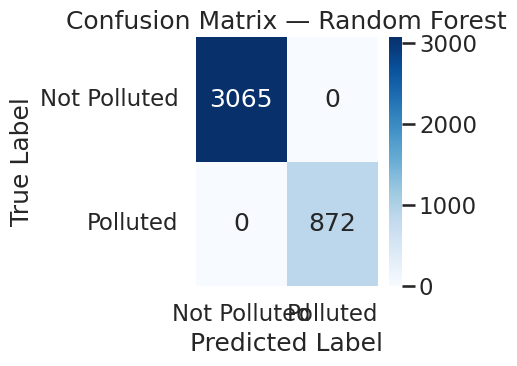

Confusion matrix:
 [[3065    0]
 [   0  872]]


In [33]:
# Confusion matrix for Random Forest

from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred_rf = rf.predict(X_test_imp)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ["Not Polluted", "Polluted"])
plt.yticks([0.5, 1.5], ["Not Polluted", "Polluted"], rotation=0)
plt.tight_layout()
plt.show()

print("Confusion matrix:\n", cm)


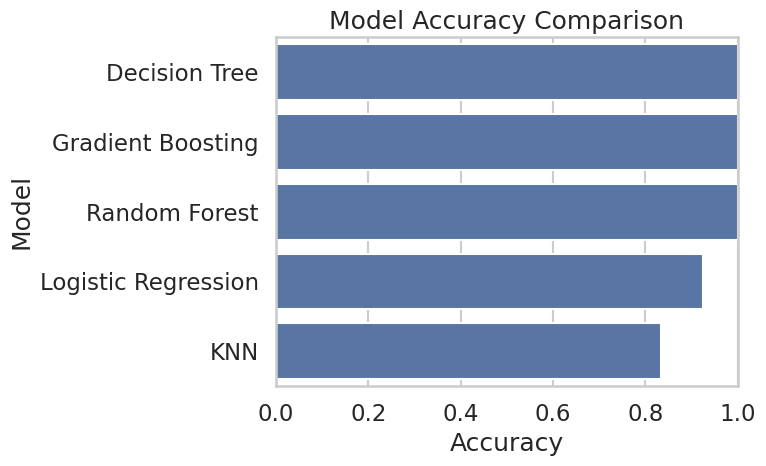

Model accuracies:
Decision Tree          1.000000
Gradient Boosting      1.000000
Random Forest          1.000000
Logistic Regression    0.924562
KNN                    0.833122
dtype: float64


In [34]:
# Model accuracy comparison bar chart

from sklearn.metrics import accuracy_score

accuracies = {}

for name, model in models.items():
    y_pred = model.predict(X_test_imp)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

acc_series = pd.Series(accuracies).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=acc_series.values, y=acc_series.index)
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

print("Model accuracies:")
print(acc_series)
